In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as Line2D

In [2]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
def convert(value):
    if isfloat(value):
        return float(value)
    elif value[-1] == '%' and isfloat(value[:-1]):
        return float(value[:-1])/100.
    elif value[-1] == 's' and isfloat(value[:-1]):
        return float(value[:-1])
    else:
        return np.nan

In [80]:
logv = []        # matrix of log values logv[line][col]
with open("benchmark.gurobi.out",'r') as f:
    # look for problem
    problem = 'glass4'
    for line in f:
        if line.find(problem) > 0:
            print line
            break
    for line in f:
        if line.find('Depth IntInf') > 0:
            print line
            break
    for line in f:
        if len(line) < 2:
            break
    first_line = True
    for line in f:
        #print line
        if len(line) < 2:    # end of log table
            break
        fields = []
        linetype = line[0]           # column 0 may contain 'H' or '*' or space
        fields.append(linetype)      # not all fields are present for each linetype
        line = line[1:]
        words = line.split()
        #print words
                                     # note missing fields depending on linetype
        if linetype == ' ':
            if words[2] == 'infeasible':
                indices = list(range(0,4)+[np.NaN]+list(range(4,9)))
            elif words[2] == 'cutoff':
                indices = list(range(0,4)+[np.NaN]+list(range(4,9)))
            else:
                indices = list(range(0,10))
        elif linetype == 'H':
            indices = list(range(0,2)+[np.NaN]*3+list(range(2,7)))
        elif linetype == '*':
            indices = list(range(0,2)+[np.NaN]+[2]+[np.NaN]+list(range(3,8)))
        #print indices
        for index in indices:
            if isinstance(index,(int)):
                fields.append(convert(words[index]))
            else:
                fields.append(np.nan)
        #print fields
        logv.append(fields)
#print logv

@01 instances/miplib2010/glass4.mps.gz ===========

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time



In [83]:
mat = np.array(logv)
# to do: convert df to time series dataframe
df = pd.DataFrame(logv,
                  columns=['H*','Expl','Unexpl','Obj','Depth',
                           'IntInf','Incumb Bd','Best Bd','Gap','Iter/Node','Time'])
df

,H*,Expl,Unexpl,Obj,Depth,IntInf,Incumb Bd,Best Bd,Gap,Iter/Node,Time
0,,0,0,800000000,0,72,3475000000,800000000,0.7700,NaN,0
1,H,0,0,NaN,NaN,NaN,2100018000,800000000,0.6190,NaN,0
2,,0,0,800000000,0,72,2100000000,800000000,0.6190,NaN,0
3,,0,0,800000000,0,72,2100000000,800000000,0.6190,NaN,0
4,,0,0,800000000,0,72,2100000000,800000000,0.6190,NaN,0
5,,0,2,800000000,0,72,2100000000,800000000,0.6190,NaN,0
6,H,27,27,NaN,NaN,NaN,1966685000,800000000,0.5930,11.6,0
7,H,135,134,NaN,NaN,NaN,1966685000,800000000,0.5930,6.3,0
8,H,572,451,NaN,NaN,NaN,1962518000,800000000,0.5920,6.3,0
9,*,1958,1055,NaN,108,NaN,1920019000,800000000,0.5830,4.9,0


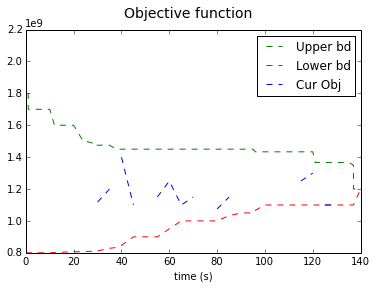

In [84]:
plt.plot(mat[2:,10],mat[2:,6],'g--',label='Upper bd')
plt.plot(mat[2:,10],mat[2:,7],'r--',label='Lower bd')
plt.plot(mat[2:,10],mat[2:,3],'b--',label='Cur Obj')
plt.legend()
plt.suptitle('Objective function',fontsize=14)
plt.xlabel('time (s)')
plt.show()

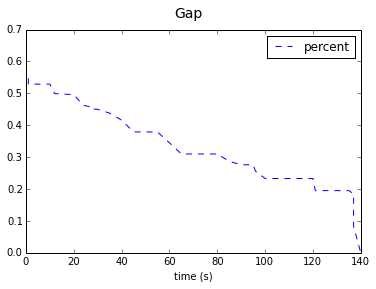

In [79]:
plt.plot(mat[2:,10],mat[2:,8],'b--',label='percent')
plt.legend()
plt.suptitle('Gap',fontsize=14)
plt.xlabel('time (s)')
plt.show()